<a href="https://colab.research.google.com/github/abinayanand7896-cloud/Abinaya_Anand/blob/main/Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Electric Vehicle Population Dataset Analysis**

**Introduction**

As a data science consultant, I was assigned a task to analyze the Electric Vehicle Population Dataset. The global automotive industry is rapidly growing and Electric Vehicles are increasingly popular due to environmental policies, consumer demand and the advancement in battery technology. My client works in the sustainable mobility sector and they are interested in understanding how the EV adoption is evolving in Washington. Also, the client wants to gain actionable insights into customer adoption trends, regional distribution of EVs to guide infrastructure development, policy planning and market strategy.


This project will follow the in-depth, structured process to analyze the provided dataset and answer critical business questions.


**Dataset Information**

The dataset is from the kaggle.
https://www.kaggle.com/datasets/yashusinghal/electric-vehicle-population-dataset?resource=download


This dataset shows the battery and plug-in electric vehicles that are registered through the Washington State Department of Licensing.

**Business Questions:**


1. How does the electric vehicle adoption vary across cities, which one is leading and which one is lagging?

2. How is the adoption of Battery and Plug-in electric vehicle has evolved accross the different model years?

3. How strongly electric range, price of the vehicle and model year are linked in building the electric vehicle adoption?

4. How long is the ownership or registration duration for electric vehicles?

5. Which manufacturers provide the most long ranging electric vehicles?

6. How does the market share and growth compare among new or emerging brands vs the established brands?

7. Does the new model vehicle always has the Clean Alternative Fuel Vehicle(CAFV) Eligibility, check it with the model year

# **Step 1: Data Import and Initial Exploration**

**Loading the Dataset**

The first step is to import the dataset and take an initial look at it structure. I will load the required libraries and the provided dataset for analysis.

In [ ]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import datetime

#Loading the dataset

df_org = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

In [ ]:
#Check for the shape of the dataset and list sample fields

print(df_org.shape)
display(df_org.head())
print()

(166800, 17)


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [ ]:
# Checking for the null values

df_org.isna().sum()

,0
VIN (1-10),0
County,5
City,5
State,0
Postal Code,5
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


# **Step 2: Data Cleaning**

Data Cleaning is the most important part before doing the analysis. We have found null values in few of the columns in the provided dataset and we need to handle the same.

**Handling Null Values**

In [ ]:
df = df_org.copy()



df['County'] = df['County'].fillna('unknown')
df['City'] = df['City'].fillna('unknown')
df['Postal Code'] = df['Postal Code'].fillna('unknown')
df['Legislative District'] = df['Legislative District'].fillna('unknown')
df['Vehicle Location'] = df['Vehicle Location'].fillna('unknown')
df['Electric Utility'] = df['Electric Utility'].fillna('unknown')
df['2020 Census Tract'] = df['2020 Census Tract'].fillna(0)



**Explanation to handle the null values by the above method**

All the columns are filled with either unknown or 1, so that we don't miss any rows. Also it's better than filling with incorrect values, which could skew the results.


In [ ]:
# Displaying the columns, after the nulls are removed

df.isna().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


# **Step 3: Exploratory Data Analysis(EDA)**

Now the data has been cleaned, we need to start exploring it to answer the business questions.



**BQ1:** How does the electric vehicle adoption vary across cities, which one is leading and which one is lagging?

***Importance:*** EV adoption is not uniform across the cities. By analyzing that which area is leading, it will help the government and businesses to plan the battery charging Infastructure

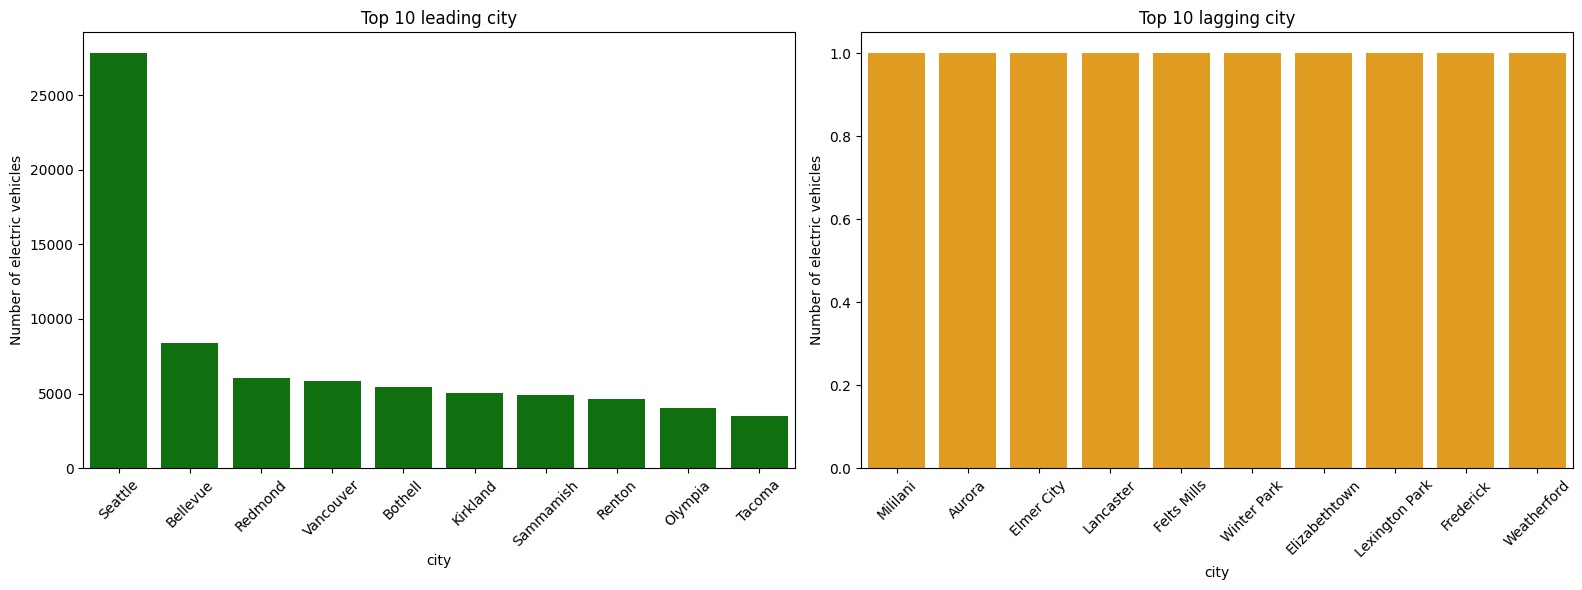

In [ ]:
#Count of electric vehicle by city
city_counts = df["City"].value_counts()

#taking the top 10 leading cities
top_city = city_counts.head(10)

#taking the bottom 10 lagging cities
bottom_city = city_counts.tail(10)

plt.figure(figsize=(16,6))

#code to visualize the leading cities
plt.subplot(1,2,1)
sns.barplot(x=top_city.index, y=top_city.values, color="green")
plt.title("Top 10 leading city")
plt.xlabel("city")
plt.ylabel("Number of electric vehicles")
plt.xticks(rotation=45)

#code to visualize the lagging cities
plt.subplot(1,2,2)
sns.barplot(x=bottom_city.index, y=bottom_city.values, color="orange")
plt.title("Top 10 lagging city")
plt.xlabel("city")
plt.ylabel("Number of electric vehicles")
plt.xticks(rotation=45)

plt.tight_layout() # Tight Layout function is used to adjust spaces so that titles and labels does not overlap
plt.show()




***Explanation:***

To Check on the leading and lagging citities in electric vehicle, we required the city column to interpret it. With this result, we could say that the adoption varies accross cities. Seattle leads by a wide margin with more than 25000 EVs, which reflects the strong infrastructure, awareness and the supportive policies.Other cities like Bellevue, redmond, Vancouver also shows the higher rate of adoption, but not compared to Seattle.


On the other hand, the bottom 10 cities shown in the chart, lags in the adoption of electric vehicle, often limited to one vehicle registered.

This contrasts highlight that the urban areas are lagging behind whereas the major cities are adopting more to electric vehicles.

**BQ2:** How is the adoption of Battery and Plug-in electric vehicle has evolved accross the different model years?

***Importance:*** This analysis will help us to find if the new models are only Battery EVs which shows a shift in technology preference

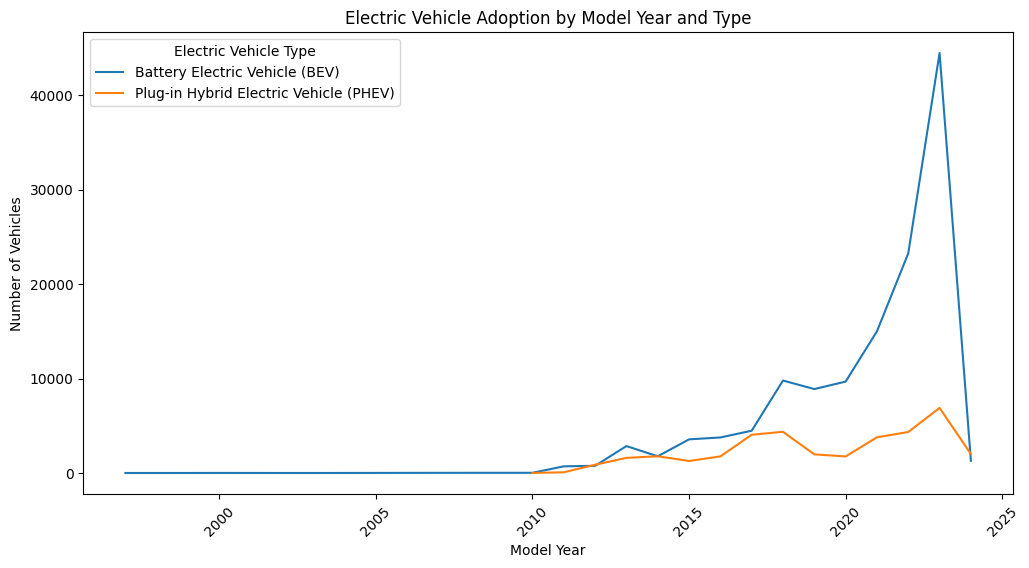

In [ ]:
#Grouping by the model year and EV Type

year_type = df.groupby(["Model Year", "Electric Vehicle Type"]).size().reset_index(name="Count")

plt.figure(figsize=(12,6))
sns.lineplot(data=year_type, x="Model Year", y="Count", hue="Electric Vehicle Type")
plt.title("Electric Vehicle Adoption by Model Year and Type")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.show()

***Explanation***:

To interpret the adoption of EV type along with the model year, we required bot these two columns to analyse and visualize it.

In the X-axis, it shows the Model Year and in Y-axis count of the vehicle registered during the year has been shown. The color difference is shown to see the type of vehicle.

Electric vehicles are almost non existent before 2010. Adoption have started to grow only after that. BEVs are grown rapidly and it is in the majority. Plug-in hydrid vehicle were adopted only in a smaller pace.

Overall, the market is totally shifting to BEVs which is fully electric vehicle, leading to a future of electric mobility.

**BQ3:** How strongly electric range, price of the vehicle and model year are linked in building the electric vehicle adoption?

***Importance:***  This analysis will help us to understand how the model, price and performance of the vehicle are related, which could show whether the latest or expensive vehicles offer better range.

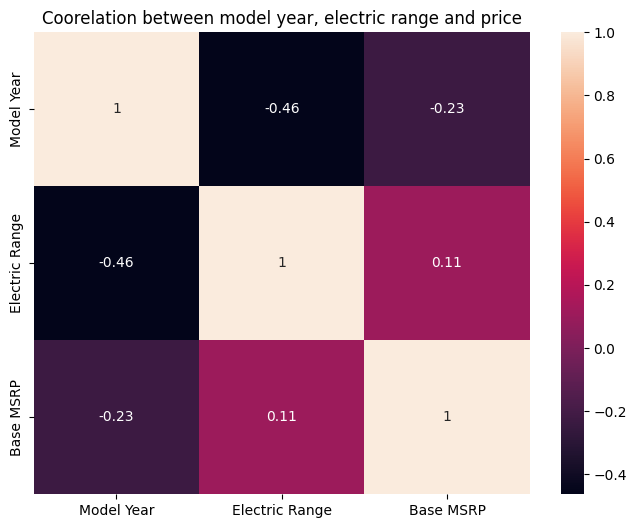

In [ ]:
#selecting the columns that is required for correlation
corr_df=df[["Model Year", "Electric Range", "Base MSRP"]]

plt.figure(figsize=(8,6))
sns.heatmap(corr_df.corr(), annot=True)
plt.title("Coorelation between model year, electric range and price")
plt.show()

***Explanation***:

*Model year Vs Electric Range:*

This is -0.46 which shows the moderately negative coorelation. This shows that newer models doesnot always have higher electric range compared to the old ones.

*Model year Vs Base MSRP:*

This is  a weak negative coorelation which -0.23. Newer models are not consistently expensive and the proce don't rise or fall with model year.

*Electric Range Vs Base MSRP:*

This is very weak positive coorelation(0.11). The cars that has higher range is slightly expensive, but teh relationship is weak.

This analysis shows that model year, vehicle price and the electric range are weakly coorelated which means that simply releasing new models, low price and slightly changing the range doesnot lead to adoption.

**BQ4:** How long is the ownership or registration duration for electric vehicles?

***Importance:*** Understanding the duration of the ownership help us to understand vehicle lifecycle, battery reliability and the resale potential.

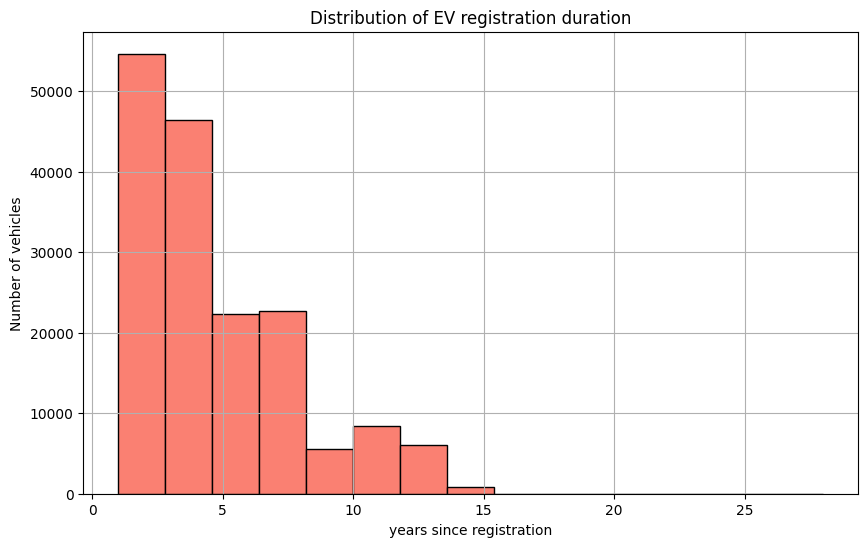

In [ ]:
#Calculating the duration of registration

current_year = datetime.now().year #this gets the actual current year
df['Reg_duration'] = current_year - df['Model Year']

plt.figure(figsize=(10,6))
df['Reg_duration'].hist(bins=15, color="salmon", edgecolor="black")
plt.title("Distribution of EV registration duration")
plt.xlabel("years since registration")
plt.ylabel("Number of vehicles")
plt.show()


***Explanation***:

We doesnot have the date of registration or it's duration column, so we have interpreted it with the model year and current year.

With this, we could analyse that Most electric vehicles that are on the road are recently registered. Most of those were registered on the last 1 to 3 years.After 5 years, the numbers of registered EVs drops and very few have been in use for more than 10 years.

**BQ5:** Which manufacturers provide the most long ranging electric vehicles?

***Importance:*** BY understanding which manufacturers make the longest range vehicles helps us to know about the best performance products

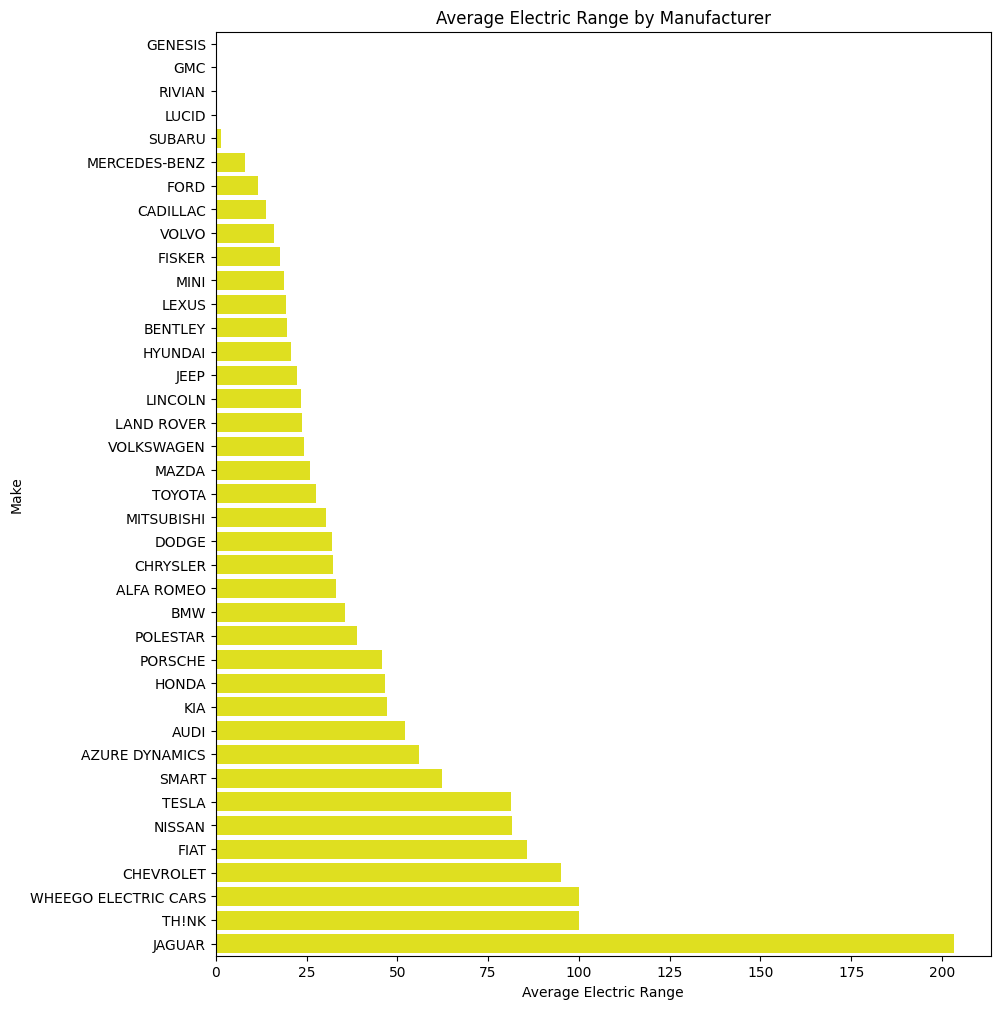

In [ ]:
#Grouping the manufacturer and calculating the average range

range = df.groupby('Make')['Electric Range'].mean().sort_values(ascending=True).reset_index()

#Visualizing with horizontal bar chart for the good visibility

plt.figure(figsize=(10,12))
sns.barplot(x='Electric Range', y='Make', data=range, color='yellow')
plt.title("Average Electric Range by Manufacturer")
plt.xlabel("Average Electric Range")
plt.ylabel("Make")
plt.show()


***Explanation:***

We take the mean of electric range column and getting the manufacturer details and interpreting this.

This visualization shows that Jaguar is the top most manufacturer, who gives highest electric range and the lowest is genesis.

**BQ6:** How does the market share and growth compare among new or emerging brands vs the established brands?

***Importance:*** By analyzing this we can understand if the new entrants brands are growing against the well-known or established brand so that it will help to predict the market balenace and the future competition.

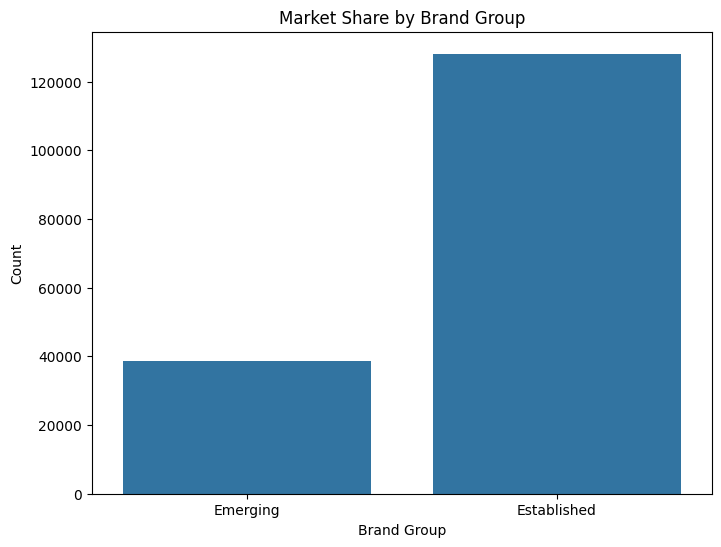

In [ ]:
#defining few of the known established brands - considering that these are all the brands that is provided by the client to compare

established_brands = ["TESLA","CHEVROLET", "NISSAN", "BMW" , "FORD", "TOYOTA", "JAGUAR", "AUDI" , "PORSCHE"]

df["Brand Group"] = df["Make"].str.upper().apply(lambda x:"Established" if x in established_brands else "Emerging")

plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Brand Group")
plt.title("Market Share by Brand Group")
plt.xlabel("Brand Group")
plt.ylabel("Count")
plt.show()

***Explanation:***

List of the established companies has been provided by the client. The established brands are TESLA, CHEVROLET, NISSAN, BMW , FORD, TOYOTA, JAGUAR, AUDI , PORSCHE. The others are considered as emerging companies that is there inside the dataset.

By looking at this we could see that always established brands growth and share is always high compared to the emerging brands.

**BQ7:** Does the new model vehicle always has the Clean Alternative Fuel Vehicle(CAFV) Eligibility, check it with the model year

***Importance:*** This question will help us to understand if all the new models does have CAFV eligility, which shows trends in eligibility across different model years


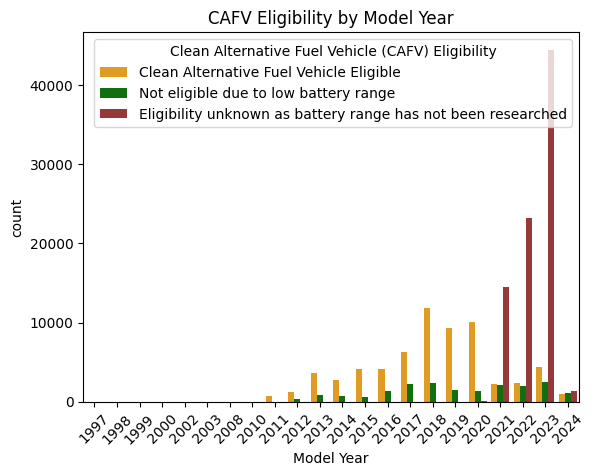

In [ ]:
sns.countplot(data=df, x="Model Year", hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility", palette=["orange","green","brown"])
plt.title("CAFV Eligibility by Model Year")
plt.xticks(rotation=45)
plt.show()


***Explanation:***

Considering the model year and CAFV columns from the dataset, not all the vehicles that are newer model is eligible for CAFV. Some might be failed due to the low range, and many of the latest models from 2021 to 2024 eligibility is unknown as the battery range is not yet reserached.

**Final Discussion and Conclusion:**

This EDA of electric vehicle population provided valuable insights on the varios patterns, trend and the factors that influence consumer preference.


**Strength of the analysis:**

This analysis leverages real-world electric vehicle data to identify temporal trends, adoption based on city and the differences between vehicle types. visualizations allows to get the clear understanding of leading and lagging regions, as well as the increasing preference of BEV and PHEV. These insights helps to understand the market dynamics and customer behavior.


**Limitations of the analysis:**

This analysis doesnot include the external factors like charging infrastructure availability, regional incentives or the consumer income which can significantly affect adoption. Also, this dataset has only the history data and doesnot capture any changes.


**Conclusion:**


The analysis of this Electric Vehicle Population dataset highlights the key trends in washington's EV market. urban areas lead the adoption where as the other regions lag, which shows the opportunity for targeted infrastructure and policy support. Battery Electric Vehicles are preferred more over Plug in hybrid. Established manufacturers dominate the emerging brands and gaining the market share. All the new model vehicles are not CAFV incentives. These insights helps the client to make data-driven decisions on market strategy, product focus, infrastructure planning, supporting sustainable mobility and growth in the EV sector.